In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [33]:
# Teste
altura_imagem = 231
comprimento = 195

In [34]:
# Criando o path para onde as imagens estão
famousim = "imagens_artistas/"
# Criando uma lista para adicionar as imagens
famous_images = []

# Fazendo um for loop para iterar sobre todas as imagens
for folder in (os.listdir(famousim)):
    folder_path = os.path.join(famousim, folder)
    for image in (os.listdir(folder_path)):
        # Adionanco o path com cada imagem para termos o arquivo da imgens
        path = os.path.join(famousim, folder ,image)
        # Lendo a imagem
        img = cv2.imread(path)
        # Transformando a imagem em preto e branco 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Adicionando a imgem na lista
        famous_images.append(img)

# Transformando a lista num array
famous_images_np = np.array(famous_images)
print(famous_images_np.shape)

(20, 231, 195)


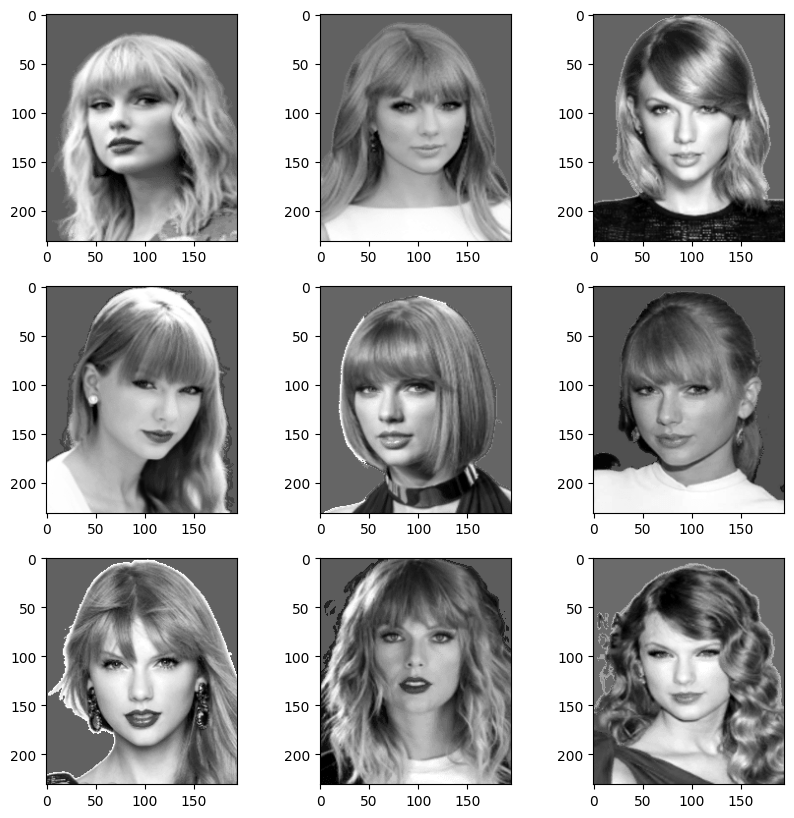

In [35]:
# Plotando a imagem
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(famous_images_np[count], cmap='gray')
        count += 1

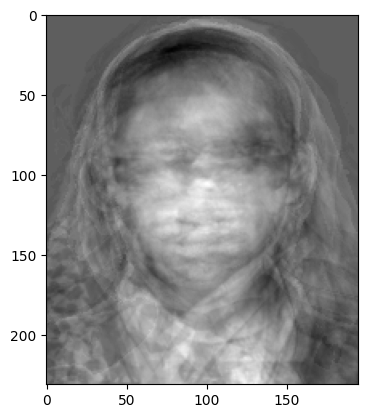

In [36]:
# Cada imagem está armazenada em "3 dimensões", cada foto está numa lista, e cada lista é uma lista de listas
# Vamos transformar a imagem num vetor coluna muito grande.
train_famous_np_matrix = famous_images_np.reshape(famous_images_np.shape[0], famous_images_np.shape[1]*famous_images_np.shape[2])
# calculamos a face média
mean_train_face = np.mean(train_famous_np_matrix, axis=0)
# Criamos uma matriz sem a a face média
centered_train_face = train_famous_np_matrix - mean_train_face

# Mostrando a face média
plt.figure()
plt.imshow(mean_train_face.reshape(altura_imagem,comprimento), cmap='gray')


In [37]:
# Decompomdo a matriz numa matriz SVD
U_Face_Famous, D_Face_Famous, V_Face_Famous = np.linalg.svd(centered_train_face, full_matrices=False)

In [38]:
print(D_Face_Famous.shape)
print(U_Face_Famous.shape)
print(V_Face_Famous.shape)
print(D_Face_Famous)
print(centered_train_face.shape)

(20,)
(20, 20)
(20, 45045)
[2.42116017e+04 1.56822340e+04 1.38896431e+04 1.28344894e+04
 1.15203159e+04 1.11238291e+04 1.03683436e+04 9.69638574e+03
 8.96027928e+03 8.37229774e+03 8.12925171e+03 7.71420607e+03
 7.19761297e+03 6.97234742e+03 6.62844747e+03 6.56402362e+03
 5.96955165e+03 5.71552264e+03 5.32822200e+03 1.22940807e-11]
(20, 45045)


In [39]:
x = sum(D_Face_Famous)
print(x) 
(np.sum(D_Face_Famous[0:17]))/x

186878.60524721825


0.9409041788321721

In [40]:
# Vamos obter a quantidade de componentes que queremos de nossa matriz. como temos apenas 17
C_Faces_TRAIN = V_Face_Famous[:17]
eigen_faces_train = C_Faces_TRAIN.reshape((-1, altura_imagem, comprimento))

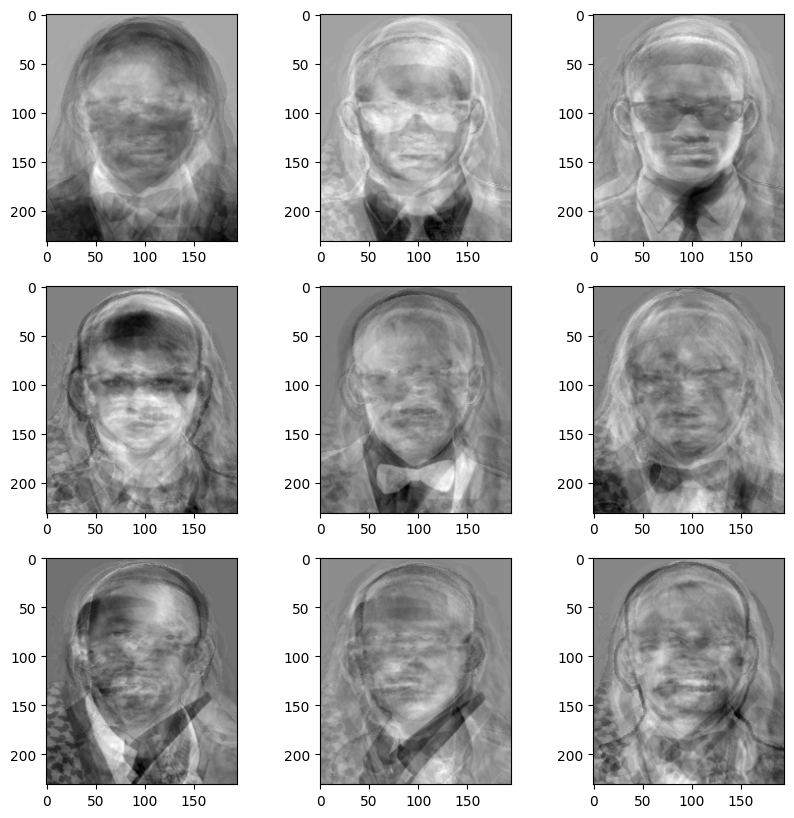

In [41]:
numero_imagens = 3
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(eigen_faces_train[count], cmap='gray')
        count += 1

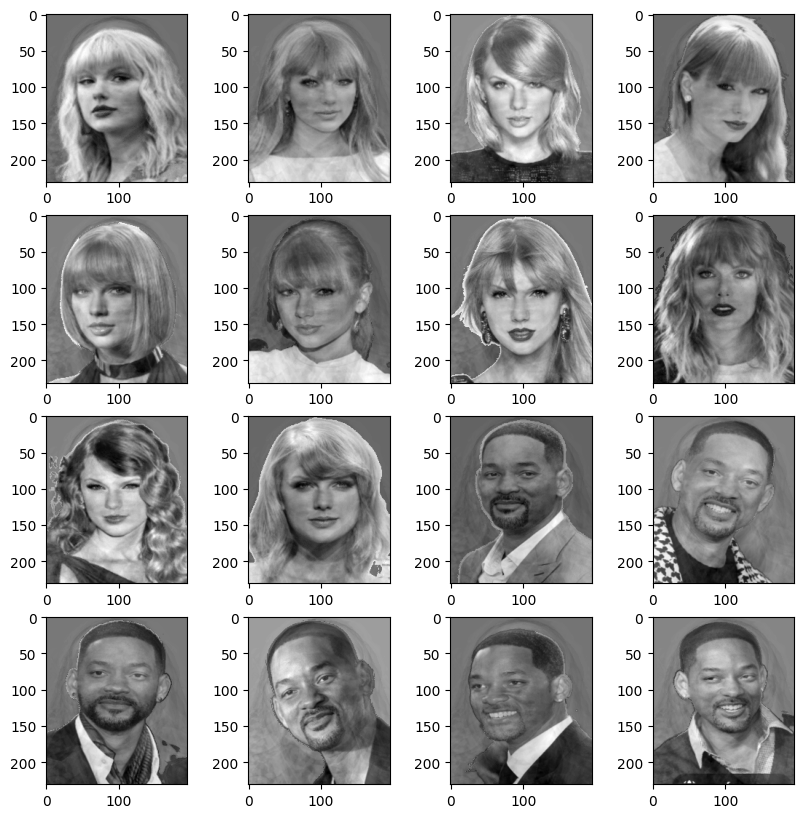

In [42]:
numero_imagens = 4
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(centered_train_face[count].reshape(altura_imagem,comprimento), cmap='gray')
        count += 1

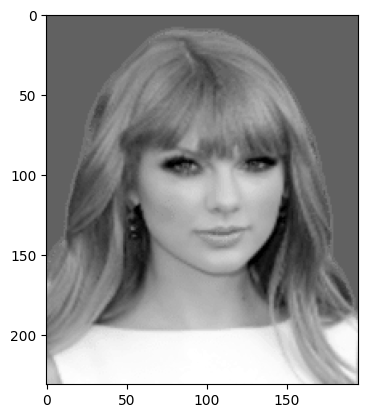

In [43]:
img = cv2.imread("imagens_artistas\TS\Captura de tela 2023-11-11 140841.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = img.flatten()
img = img - mean_train_face
coordinates = np.dot(V_Face_Famous, img)
new_img = np.dot(V_Face_Famous.T, coordinates)
new_img = new_img + mean_train_face

plt.figure()
plt.imshow(new_img.reshape(231,195), cmap='gray')
plt.show()

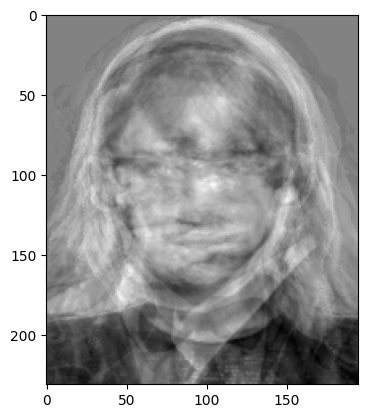

In [44]:
img = cv2.imread("imagens_teste\OIP (3).jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = img.flatten()
img = img - np.mean(img)
coordinates = np.dot(V_Face_Famous, img)
new_img = np.dot(V_Face_Famous.T, coordinates)
new_img = new_img + mean_train_face

plt.figure()
plt.imshow(new_img.reshape(231,195), cmap='gray')
plt.show()